In [9]:
import pandas as pd
df = pd.read_csv('./data/Replica_processed/processed_with_google-cleaned-trips-end-at-imd-2024-spring-thursday.csv')

### KNN imputation

In [10]:
from sklearn.impute import KNNImputer
import pandas as pd

def knn_impute_travel_df(df, n_neighbors, weights='uniform', save_path=None):
    # Column groups
    time_cols = ['transit_time', 'auto_time', 'bike_time', 'walk_time']
    dist_cols = ['transit_dist', 'auto_dist', 'bike_dist', 'walk_dist']
    coord_cols = ['o_fips', 'd_fips']
    cost_cols = ['transit_cost', 'parking_cost']
    numeric_features = time_cols + dist_cols + cost_cols

    # Normalize
    mins = df[numeric_features].min()
    maxs = df[numeric_features].max()
    df_norm = df.copy()
    df_norm[numeric_features] = (df_norm[numeric_features] - mins) / (maxs - mins)

    # Impute time/dist
    df_knn = df_norm.copy()
    df_knn[coord_cols] = df[coord_cols]
    imputer_time = KNNImputer(n_neighbors=n_neighbors, weights=weights)
    df_knn[time_cols + dist_cols] = imputer_time.fit_transform(df_knn[time_cols + dist_cols + coord_cols])[:, :len(time_cols + dist_cols)]

    # Impute cost
    features_cost = time_cols[:2] + dist_cols[:2] + coord_cols + cost_cols
    imputer_cost = KNNImputer(n_neighbors=n_neighbors, weights=weights)
    df_knn[cost_cols] = imputer_cost.fit_transform(df_knn[features_cost])[:, -len(cost_cols):]

    # Restore scale
    df_knn[numeric_features] = df_knn[numeric_features] * (maxs - mins) + mins

    if save_path:
        df_knn.to_csv(save_path, index=False)

    return df_knn

In [11]:
df_knn_20 = knn_impute_travel_df(df, n_neighbors=20, weights='uniform')
df_knn_50 = knn_impute_travel_df(df, n_neighbors=50, weights='uniform')
df_knn_80 = knn_impute_travel_df(df, n_neighbors=80, weights='uniform')
df_knn_100 = knn_impute_travel_df(df, n_neighbors=100, weights='uniform')

In [12]:
df_knn_20.to_csv('./data/Replica_processed/imputed-20-trips-end-at-imd-2024-spring-thursday.csv', index=False)
df_knn_50.to_csv('./data/Replica_processed/imputed-50-trips-end-at-imd-2024-spring-thursday.csv', index=False)
df_knn_80.to_csv('./data/Replica_processed/imputed-80-trips-end-at-imd-2024-spring-thursday.csv', index=False)
df_knn_100.to_csv('./data/Replica_processed/imputed-100-trips-end-at-imd-2024-spring-thursday.csv', index=False)

## Visualization

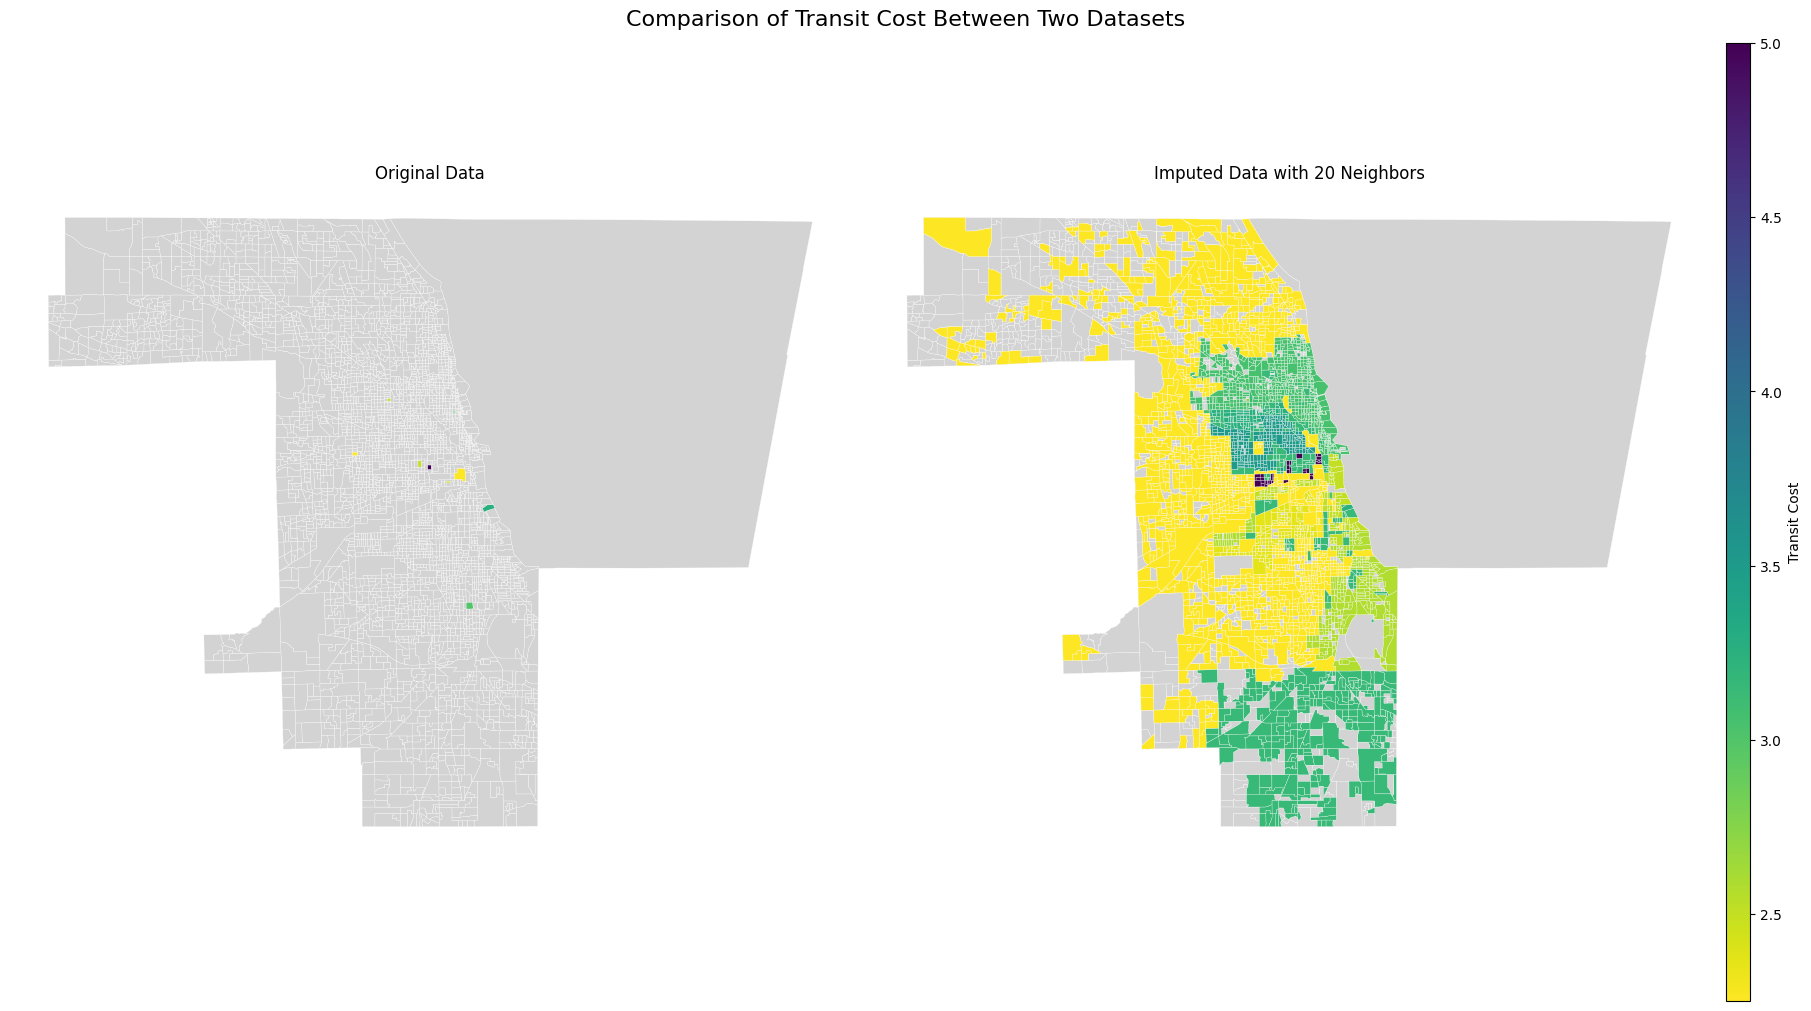

In [13]:
from spatial_visualization import compare_two_datasets_on_map
compare_two_datasets_on_map(
    df, df_knn_20,
    value_column='transit_cost',
    cmap='viridis_r',
    region='chicago',
    titles=('Original Data', 'Imputed Data with 20 Neighbors'),
    # bus_shapefile='./data/CTA_Bus Routes_2024/bus_routes.shp',
    # rail_shapefile='./data/CTA_RailLines_2024/Rail_route.shp'
)


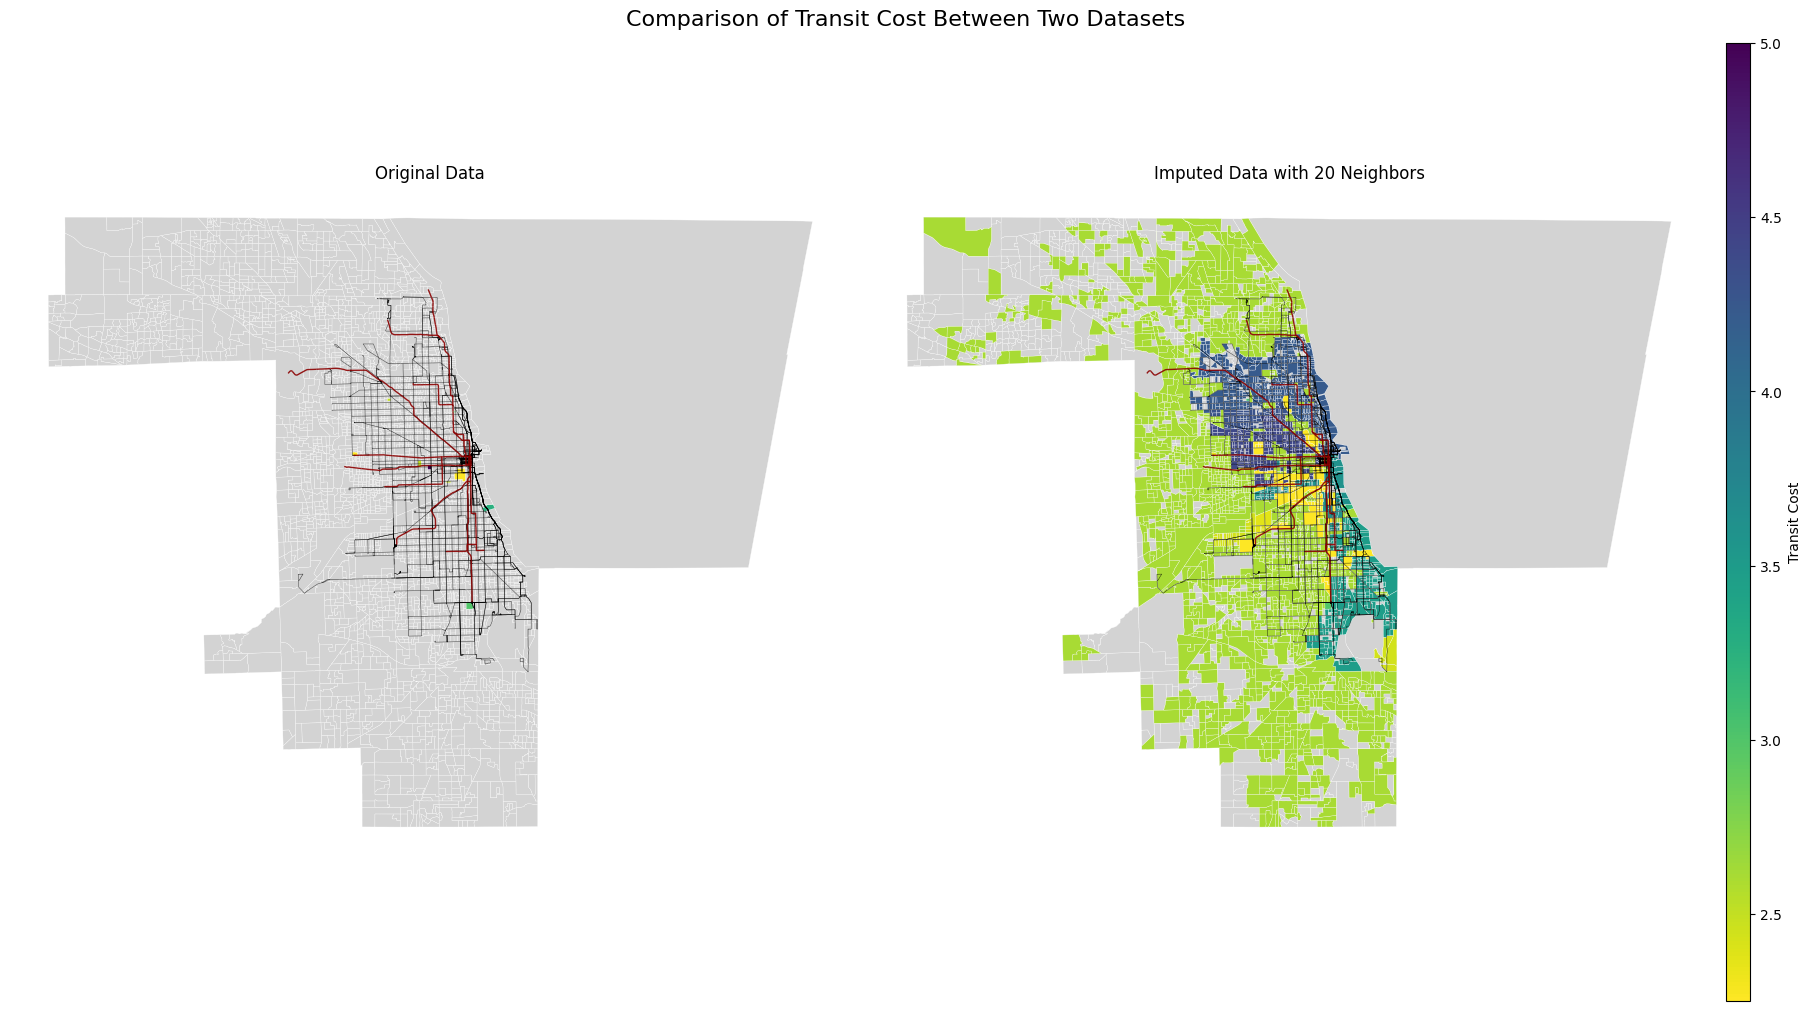

In [14]:
from spatial_visualization import compare_two_datasets_on_map
compare_two_datasets_on_map(
    df, df_knn_50,
    value_column='transit_cost',
    cmap='viridis_r',
    region='chicago',
    titles=('Original Data', 'Imputed Data with 20 Neighbors'),
    bus_shapefile='./data/CTA_Bus Routes_2024/bus_routes.shp',
    rail_shapefile='./data/CTA_RailLines_2024/Rail_route.shp'
)

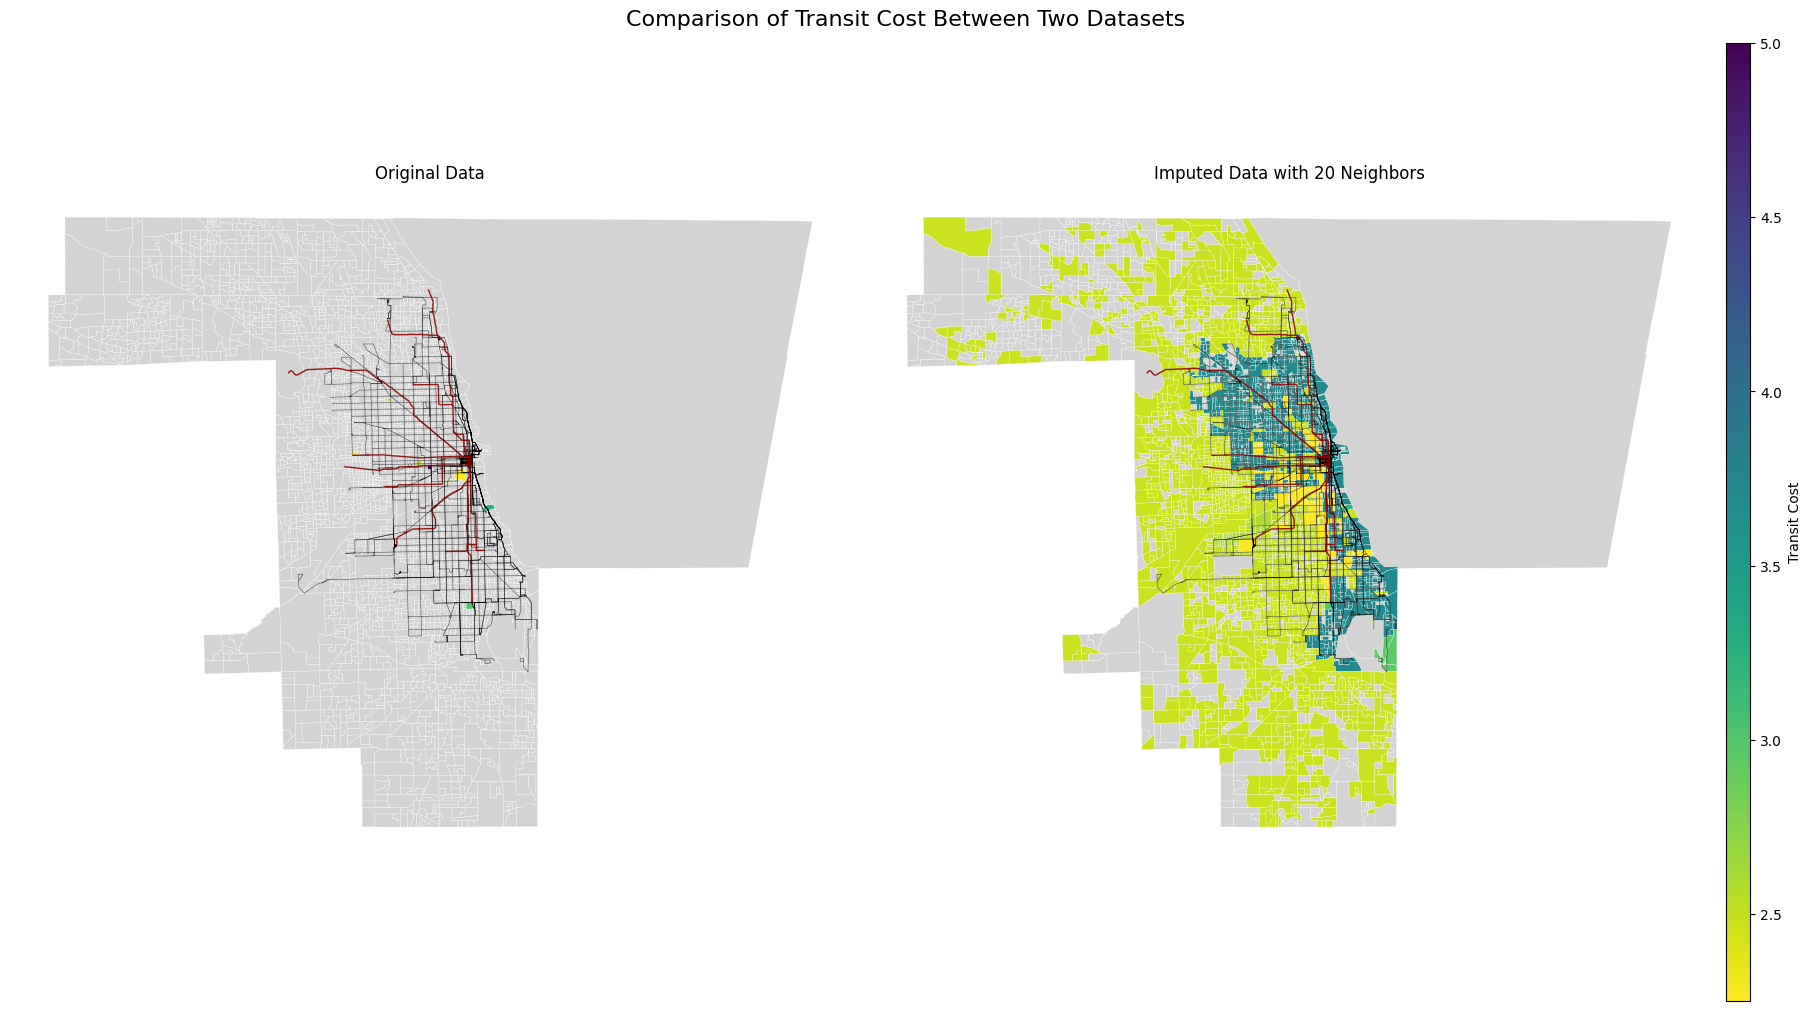

In [15]:
from spatial_visualization import compare_two_datasets_on_map
compare_two_datasets_on_map(
    df, df_knn_80,
    value_column='transit_cost',
    cmap='viridis_r',
    region='chicago',
    titles=('Original Data', 'Imputed Data with 20 Neighbors'),
    bus_shapefile='./data/CTA_Bus Routes_2024/bus_routes.shp',
    rail_shapefile='./data/CTA_RailLines_2024/Rail_route.shp'
)

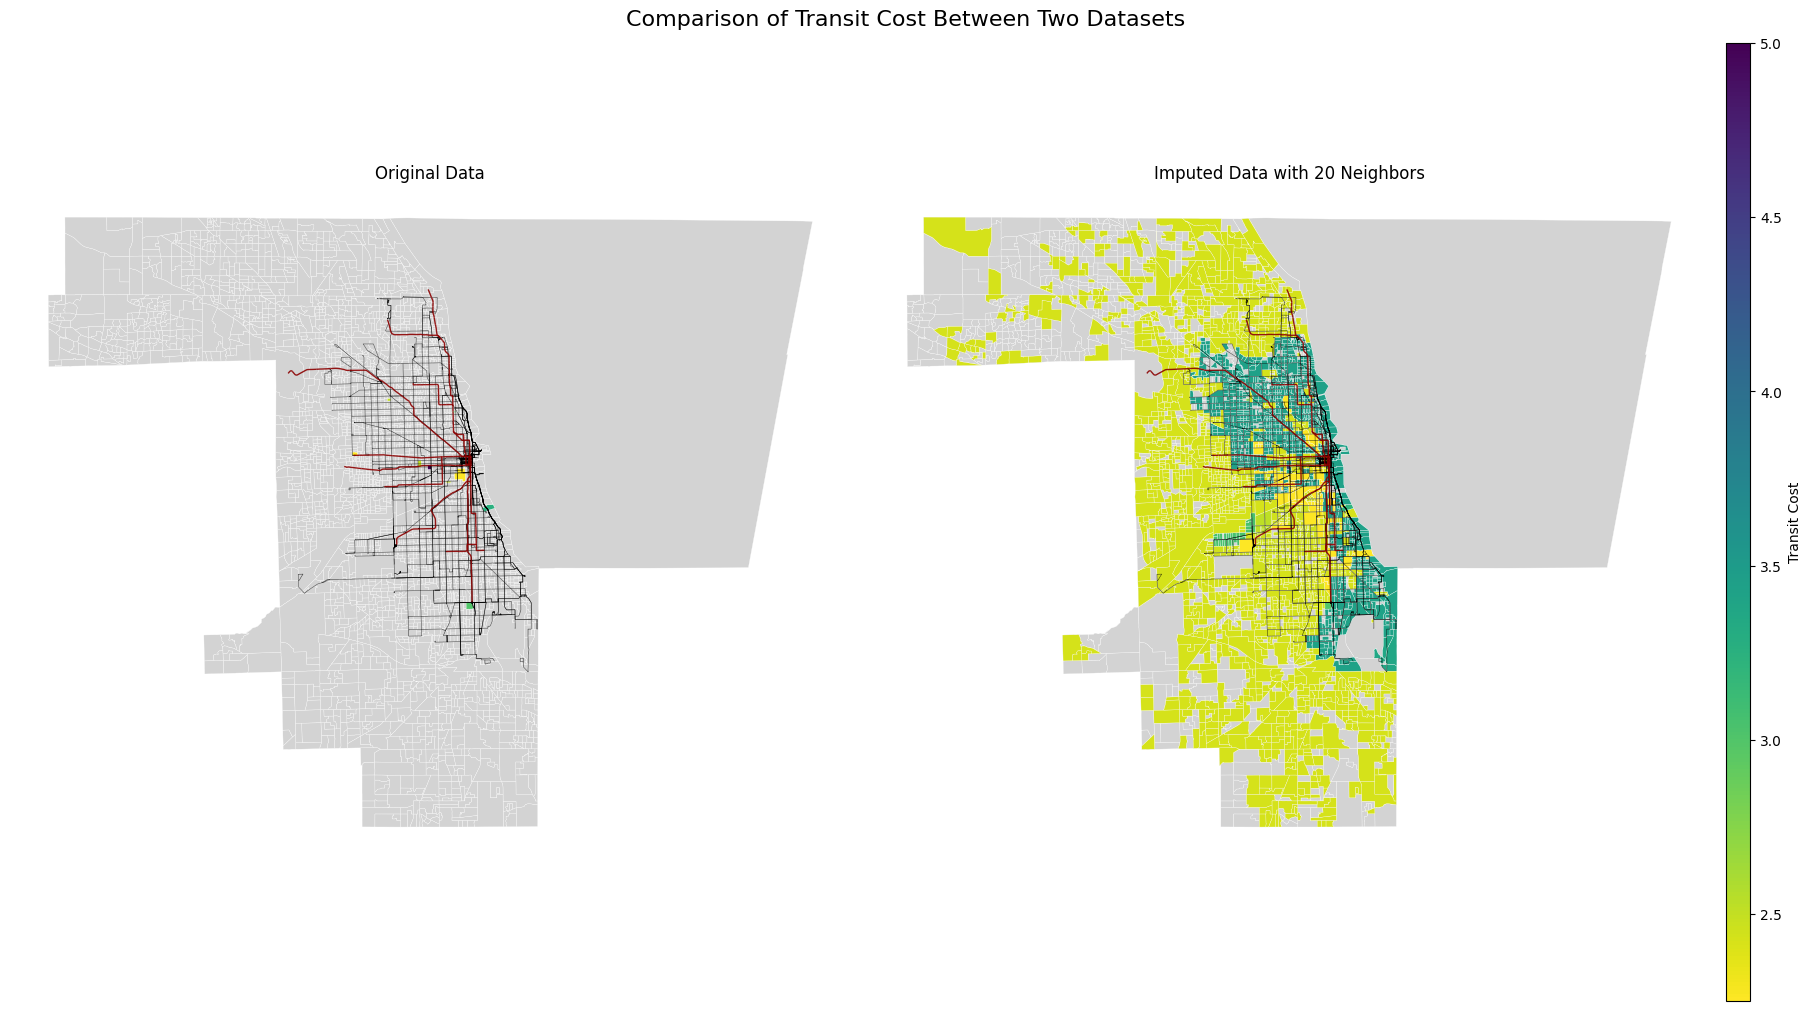

In [16]:
from spatial_visualization import compare_two_datasets_on_map
compare_two_datasets_on_map(
    df, df_knn_100,
    value_column='transit_cost',
    cmap='viridis_r',
    region='chicago',
    titles=('Original Data', 'Imputed Data with 20 Neighbors'),
    bus_shapefile='./data/CTA_Bus Routes_2024/bus_routes.shp',
    rail_shapefile='./data/CTA_RailLines_2024/Rail_route.shp'
)